In [ ]:
#!pip install sqlalchemy==1.4.46
!pip install pandasql
!pip install geopy
#!pip install -U kaleido
!pip3 install duckdb

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=958ca6e8cf62ae4039a635408e65d3cf0479cae357a152c37f1f4135ee089463
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [ ]:
import pandas as pd
import datetime as dt
import geopy.distance as gp
import matplotlib.image as mpimg
import plotly.express as px
import pandasql as ps #SQL on Pandas Dataframe
import duckdb

from matplotlib.dates import date2num
import matplotlib.pyplot as plt
import math
#import re
#import json
import os
#from collections import Counter
#import random

In [ ]:
# Mount drive to give colab access to your other files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive

'Colab Notebooks'		     indego-trips-2020-q4.zip
 forPERPAY.ipynb		     indego-trips-2021-q1.zip
 hw1.jpg			     indego-trips-2021-q2.zip
 IMG_2322.jpeg			     indego-trips-2021-q3.zip
 indego_gbfs_trips_Q1_2017.zip	     indego-trips-2021-q4.zip
 indego_gbfs_trips_Q2_2017.csv.zip   indego-trips-2022-q1.zip
 Indego_Trips_2016Q1.zip	     indego-trips-2022-q2.zip
 Indego_Trips_2016Q2.zip	     indego-trips-2022-q3.zip
 indego-trips-2017-q3.csv.zip	     indego-trips-2022-q4.zip
 indego-trips-2017-q4.csv.zip	     indego-trips-2023-q1.zip
 indego-trips-2018-q1.csv.zip	     indego-trips-2023-q2.zip
 indego-trips-2018-q2.csv.zip	     indego-trips-2023-q3.zip
 indego-trips-2018-q3.csv.zip	     indego-trips-2023-q4.zip
 indego-trips-2018-q4.csv.zip	     indego-trips-2024-q1.zip
 indego-trips-2019-q1.csv.zip	     indego-trips-2024-q2.zip
 indego-trips-2019-q2.csv.zip	     indego-trips-2024-q3.zip
 indego-trips-2019-q3-1.zip	     indego-trips-2024-q4.zip
 indego-trips-2019-q4.csv.zip	     Indego_tr

In [ ]:
!unzip /content/drive/My\ Drive/indego-trips-2024-q4.zip
!unzip /content/drive/My\ Drive/indego-trips-2024-q3.zip
!unzip /content/drive/My\ Drive/indego-trips-2024-q2.zip
!unzip /content/drive/My\ Drive/indego-trips-2024-q1.zip
!unzip /content/drive/My\ Drive/indego-trips-2023-q4.zip
!unzip /content/drive/My\ Drive/indego-trips-2023-q3.zip
!unzip /content/drive/My\ Drive/indego-trips-2023-q2.zip
!unzip /content/drive/My\ Drive/indego-trips-2023-q1.zip
!unzip /content/drive/My\ Drive/indego-trips-2022-q4.zip
!unzip /content/drive/My\ Drive/indego-trips-2022-q3.zip
!unzip /content/drive/My\ Drive/indego-trips-2022-q2.zip
!unzip /content/drive/My\ Drive/indego-trips-2022-q1.zip
!unzip /content/drive/My\ Drive/indego-trips-2021-q4.zip
!unzip /content/drive/My\ Drive/indego-trips-2021-q3.zip
!unzip /content/drive/My\ Drive/indego-trips-2021-q2.zip
!unzip /content/drive/My\ Drive/indego-trips-2021-q1.zip
!unzip /content/drive/My\ Drive/indego-trips-2020-q4.zip
!unzip /content/drive/My\ Drive/indego-trips-2020-q3.zip
!unzip /content/drive/My\ Drive/indego-trips-2020-q2.zip
!unzip /content/drive/My\ Drive/indego-trips-2020-q1.csv.zip
!unzip /content/drive/My\ Drive/indego-trips-2019-q4.csv.zip
!unzip /content/drive/My\ Drive/indego-trips-2019-q3-1.zip
!unzip /content/drive/My\ Drive/indego-trips-2019-q2.csv.zip
!unzip /content/drive/My\ Drive/indego-trips-2019-q1.csv.zip
!unzip /content/drive/My\ Drive/indego-trips-2018-q4.csv.zip
!unzip /content/drive/My\ Drive/indego-trips-2018-q3.csv.zip
!unzip /content/drive/My\ Drive/indego-trips-2018-q2.csv.zip
!unzip /content/drive/My\ Drive/indego-trips-2018-q1.csv.zip
!unzip /content/drive/My\ Drive/indego-trips-2017-q4.csv.zip
!unzip /content/drive/My\ Drive/indego-trips-2017-q3.csv.zip
!unzip /content/drive/My\ Drive/indego_gbfs_trips_Q2_2017.csv.zip
!unzip /content/drive/My\ Drive/indego_gbfs_trips_Q1_2017.zip
!unzip /content/drive/My\ Drive/Indego_trips_Q4_2016.zip
!unzip /content/drive/My\ Drive/Q3_2016_trips.zip
!unzip /content/drive/My\ Drive/Indego_Trips_2016Q2.zip
#!unzip /content/drive/My\ Drive/Indego_Trips_2016Q1.zip

Archive:  /content/drive/My Drive/indego-trips-2024-q4.zip
  inflating: indego-trips-2024-q4.csv  
Archive:  /content/drive/My Drive/indego-trips-2024-q3.zip
  inflating: indego-trips-2024-q3.csv  
Archive:  /content/drive/My Drive/indego-trips-2024-q2.zip
  inflating: indego-trips-2024-q2.csv  
Archive:  /content/drive/My Drive/indego-trips-2024-q1.zip
  inflating: indego-trips-2024-q1.csv  
Archive:  /content/drive/My Drive/indego-trips-2023-q4.zip
  inflating: indego-trips-2023-q4.csv  
Archive:  /content/drive/My Drive/indego-trips-2023-q3.zip
  inflating: indego-trips-2023-q3-2.csv  
Archive:  /content/drive/My Drive/indego-trips-2023-q2.zip
  inflating: indego-trips-2023-q2.csv  
Archive:  /content/drive/My Drive/indego-trips-2023-q1.zip
  inflating: indego-trips-2023-q1.csv  
Archive:  /content/drive/My Drive/indego-trips-2022-q4.zip
  inflating: indego-trips-2022-q4.csv  
Archive:  /content/drive/My Drive/indego-trips-2022-q3.zip
  inflating: indego-trips-2022-q3.csv  
Archive:

In [ ]:
a1=pd.read_csv('indego-trips-2024-q4.csv')
a2=pd.read_csv('indego-trips-2024-q3.csv')
a3=pd.read_csv('indego-trips-2024-q2.csv')
a4=pd.read_csv('indego-trips-2024-q1.csv')
a5=pd.read_csv('indego-trips-2023-q4.csv')
a6=pd.read_csv('indego-trips-2023-q3-2.csv')
a7=pd.read_csv('indego-trips-2023-q2.csv')
a8=pd.read_csv('indego-trips-2023-q1.csv')
a9=pd.read_csv('indego-trips-2022-q4.csv')
a10=pd.read_csv('indego-trips-2022-q3.csv')
a11=pd.read_csv('indego-trips-2022-q2.csv')
a12=pd.read_csv('indego-trips-2022-q1.csv')
a13=pd.read_csv('indego-trips-2021-q4.csv')
a14=pd.read_csv('indego-trips-2021-q3.csv')
a15=pd.read_csv('indego-trips-2021-q2.csv')
a16=pd.read_csv('indego-trips-2021-q1.csv')
a17=pd.read_csv('indego-trips-2020-q4.csv')
a18=pd.read_csv('indego-trips-2020-q3.csv')
a19=pd.read_csv('indego-trips-2020-q2.csv')
a20=pd.read_csv('indego-trips-2020-q1.csv')
#a21=pd.read_csv('indego-trips-2019-q4.csv')
#a22=pd.read_csv('indego-trips-2019-q3.csv')
#a23=pd.read_csv('indego-trips-2019-q2.csv')
#a24=pd.read_csv('indego-trips-2019-q1.csv')
#a25=pd.read_csv('indego-trips-2018-q4.csv')
#a26=pd.read_csv('indego-trips-2018-q3.csv')
#a27=pd.read_csv('indego-trips-2018-q2.csv')
#a28=pd.read_csv('indego-trips-2018-q1.csv')
#a29=pd.read_csv('indego-quarter-echo.bicycletransit.com-2018-01-19-9-57 AM.csv')
#a30=pd.read_csv('indego-trips-2017-q3.csv')
#a31=pd.read_csv('indego_gbfs_trips_Q2_2017.csv')
#a32=pd.read_csv('indego_gbfs_trips_Q1_2017.csv')
#a33=pd.read_csv('Indego_trips_Q4_2016.csv')
#a34=pd.read_csv('Q3_2016_trips.csv')
#a35=pd.read_csv('Indego_Trips_2016Q2.csv')
#a36=pd.read_csv('Indego_Trips_2016Q1.csv')

<ipython-input-6-da9c59b19d82>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  a1=pd.read_csv('indego-trips-2024-q4.csv')
<ipython-input-6-da9c59b19d82>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  a2=pd.read_csv('indego-trips-2024-q3.csv')
<ipython-input-6-da9c59b19d82>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  a3=pd.read_csv('indego-trips-2024-q2.csv')
<ipython-input-6-da9c59b19d82>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  a4=pd.read_csv('indego-trips-2024-q1.csv')
<ipython-input-6-da9c59b19d82>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  a5=pd.read_csv('indego-trips-2023-q4.csv')
<ipython-input-6-da9c59b19d82>:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option 

In [ ]:
# List of your DataFrames
all_dfs = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20]

# Concatenate all DataFrames
collated_df = pd.concat(all_dfs, ignore_index=True)

In [ ]:
collated_df['start_time_clean'] = pd.to_datetime(collated_df['start_time'], errors='coerce',infer_datetime_format=True)

<ipython-input-8-9d79cf11bc38>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  collated_df['start_time_clean'] = pd.to_datetime(collated_df['start_time'], errors='coerce',infer_datetime_format=True)


In [ ]:
collated_df['year_month'] = collated_df['start_time_clean'].dt.to_period('M')  # Group by Year-Month

In [ ]:
monthly_data = collated_df.groupby('year_month').agg(
    total_trips=('trip_id', 'count'),
    avg_trip_duration=('duration', 'mean')
).reset_index()

In [ ]:
monthly_data['MoM_growth_trips'] = monthly_data['total_trips'].pct_change() * 100
monthly_data['MoM_growth_duration'] = monthly_data['avg_trip_duration'].pct_change() * 100

In [ ]:
monthly_data['YoY_growth_trips'] = monthly_data['total_trips'].pct_change(periods=12) * 100
monthly_data['YoY_growth_duration'] = monthly_data['avg_trip_duration'].pct_change(periods=12) * 100

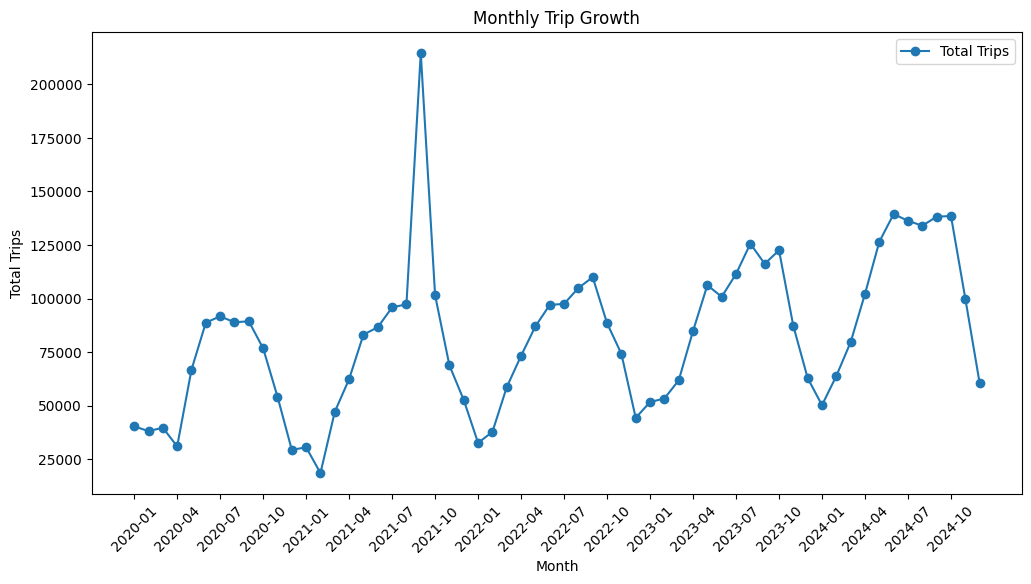

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['year_month'].astype(str), monthly_data['total_trips'], marker='o', label="Total Trips")
plt.xticks(monthly_data['year_month'].astype(str)[::3], rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Trips")
plt.title("Monthly Trip Growth")
plt.legend()
plt.show()

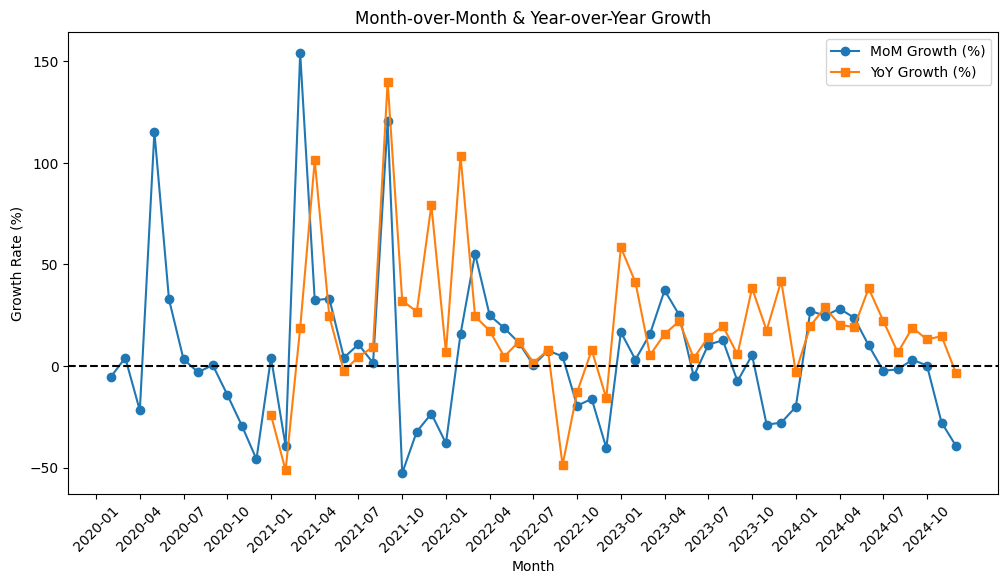

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['year_month'].astype(str), monthly_data['MoM_growth_trips'], marker='o', label="MoM Growth (%)")
plt.plot(monthly_data['year_month'].astype(str), monthly_data['YoY_growth_trips'], marker='s', label="YoY Growth (%)")
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(monthly_data['year_month'].astype(str)[::3], rotation=45)  # Show every 3rd tick
plt.xlabel("Month")
plt.ylabel("Growth Rate (%)")
plt.title("Month-over-Month & Year-over-Year Growth")
plt.legend()
plt.show()

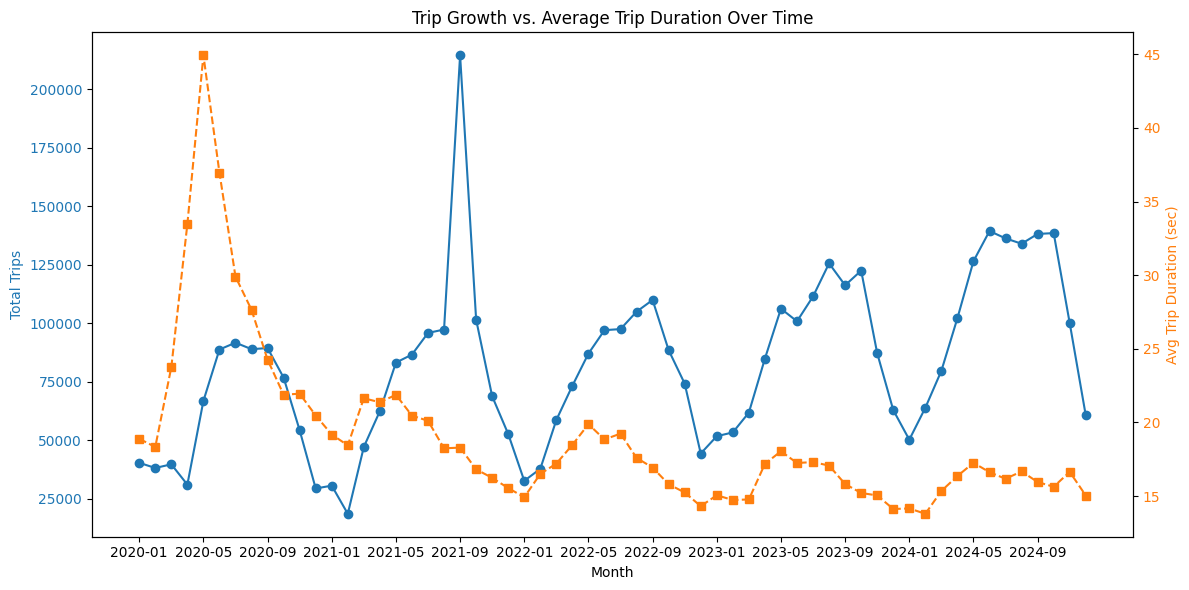

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# X-axis labels
x = monthly_data['year_month'].astype(str)

# Plot total trips on left Y-axis
color = 'tab:blue'
ax1.set_xlabel("Month")
ax1.set_ylabel("Total Trips", color=color)
ax1.plot(x, monthly_data['total_trips'], marker='o', color=color, label='Total Trips')
ax1.tick_params(axis='y', labelcolor=color)

# Plot average duration on right Y-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel("Avg Trip Duration (sec)", color=color)
ax2.plot(x, monthly_data['avg_trip_duration'], marker='s', linestyle='--', color=color, label='Avg Duration')
ax2.tick_params(axis='y', labelcolor=color)

# Title & layout
plt.title("Trip Growth vs. Average Trip Duration Over Time")
fig.tight_layout()
plt.xticks(monthly_data['year_month'].astype(str)[::4], rotation=90)  # Show every 3rd tick
plt.show()
plt.savefig('my_plot.png')

In [ ]:
station_monthly = collated_df.groupby(['year_month', 'start_station']).agg(
    trips=('trip_id', 'count'),
    avg_duration=('duration', 'mean')
).reset_index()

In [ ]:
# Pivot table: rows = station, columns = month, values = trip count
station_trips_pivot = station_monthly.pivot(index='start_station', columns='year_month', values='trips')

# Calculate month-over-month growth
station_growth = station_trips_pivot.pct_change(axis=1) * 100

# Average growth rate per station
station_growth['avg_growth_rate'] = station_growth.mean(axis=1)
station_growth_sorted = station_growth.sort_values(by='avg_growth_rate', ascending=False)

<ipython-input-17-6f734bf2a3d1>:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  station_growth = station_trips_pivot.pct_change(axis=1) * 100


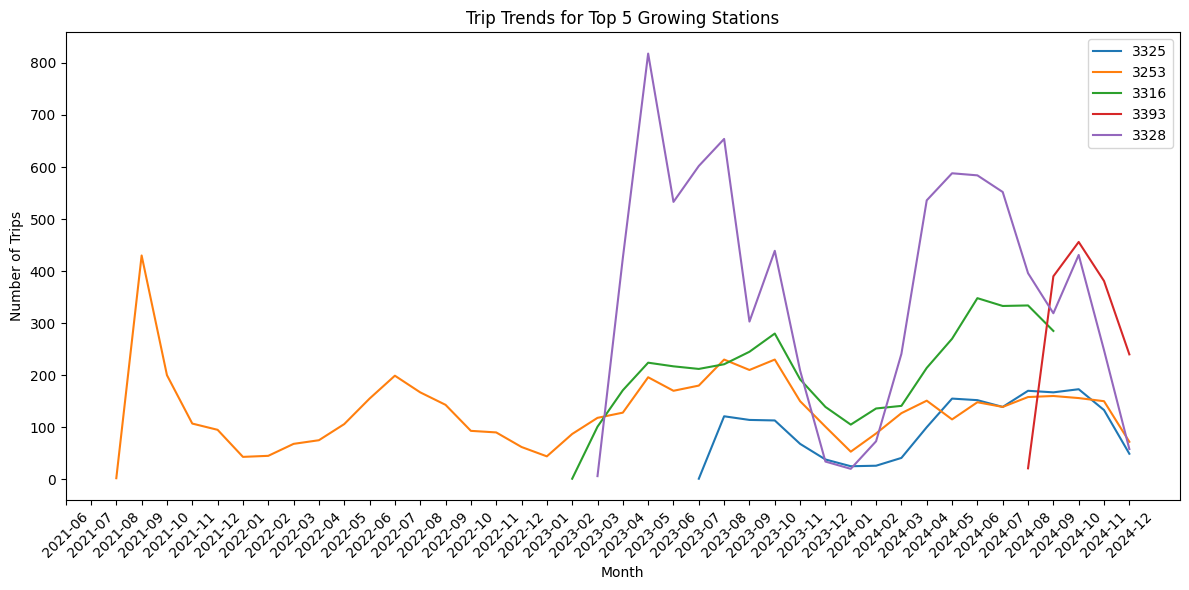

In [ ]:
top_stations = station_growth_sorted.head(5).index

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for station in top_stations:
    plt.plot(station_trips_pivot.columns.astype(str), station_trips_pivot.loc[station], label=station)

plt.title("Trip Trends for Top 5 Growing Stations")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
latest_month = collated_df['year_month'].max()

# Filter to latest month and group
top_station_counts = (
    collated_df[collated_df['year_month'] == latest_month]
    .groupby(['start_station'])
    .agg(trips=('trip_id', 'count'), lat=('start_lat', 'first'), lon=('start_lon', 'first'))
    .reset_index()
)

# Sort by trips and take top 10
top_stations = top_station_counts.sort_values(by='trips', ascending=False).head(10)

In [ ]:
import folium

# Create map centered on Philadelphia
m = folium.Map(location=[39.9526, -75.1652], zoom_start=13)

# Add circle markers for each top station
for _, row in top_stations.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=8 + (row['trips'] / 1000),  # Scaled bubble size
        popup=f"Station: {row['start_station']}<br>Trips: {row['trips']}",
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Save or display the map
m.save("top_stations_map.html")

In [ ]:
from IPython.display import IFrame

IFrame("top_stations_map.html", width=700, height=500)

In [ ]:
import folium

# Create map centered on Philadelphia
m = folium.Map(location=[39.9526, -75.1652], zoom_start=13)

# Normalize trip counts for better scaling (optional but helpful for visuals)
max_trips = top_stations['trips'].max()

for _, row in top_stations.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + (15 * row['trips'] / max_trips),  # Scale size: 5 to 20 radius
        popup=folium.Popup(
            f"<b>Station ID:</b> {row['start_station']}<br><b>Trips:</b> {row['trips']}",
            max_width=200),
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

m.save("top_stations_map1.html")

In [ ]:
monthly_trips = collated_df.groupby('year_month')['trip_id'].count().reset_index()
monthly_trips['year_month'] = monthly_trips['year_month'].astype(str)

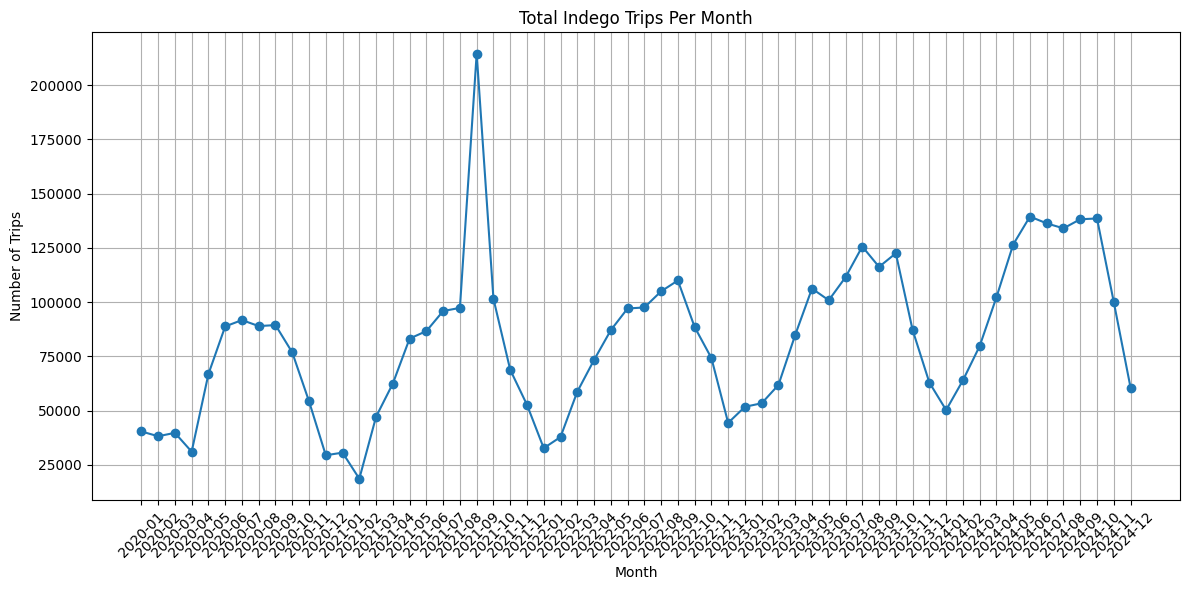

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_trips['year_month'], monthly_trips['trip_id'], marker='o')
plt.xticks(rotation=45)
plt.title("Total Indego Trips Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
collated_df['start_time'] = pd.to_datetime(collated_df['start_time'])
collated_df['year'] = collated_df['start_time'].dt.year
yearly_trips = collated_df.groupby('year')['trip_id'].count().reset_index()

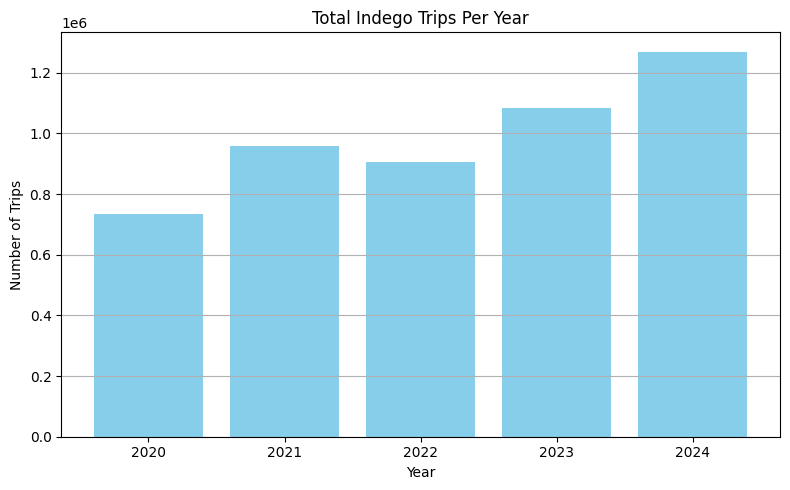

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(yearly_trips['year'], yearly_trips['trip_id'], color='skyblue')
plt.title("Total Indego Trips Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [ ]:
collated_df['passholder_type'].value_counts()

,count
passholder_type,
Indego30,3332629
Indego365,1206743
Day Pass,385068
Walk-up,27980
IndegoFlex,9


In [ ]:
subscriber_types = ['Indego30', 'Indego365', 'Day Pass', 'Walk-up','IndegoFlex']
collated_df['is_subscriber'] = collated_df['passholder_type'].isin(subscriber_types)

In [ ]:
monthly_subscribers = (
    collated_df[collated_df['is_subscriber']]
    .groupby('year_month')['trip_id']
    .count()
    .reset_index()
    .rename(columns={'trip_id': 'subscriber_trips'})
)

monthly_subscribers['year_month'] = monthly_subscribers['year_month'].astype(str)

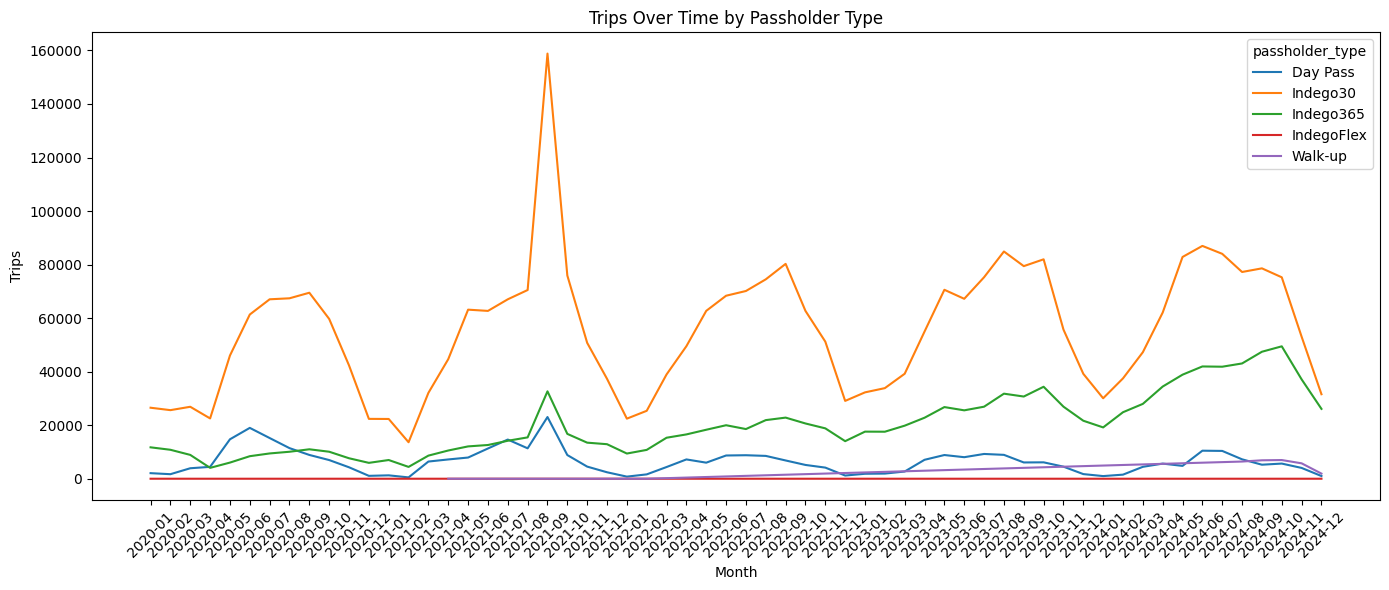

In [ ]:
passholder_monthly = (
    collated_df.groupby(['year_month', 'passholder_type'])['trip_id']
    .count()
    .reset_index()
    .rename(columns={'trip_id': 'trips'})
)

passholder_monthly['year_month'] = passholder_monthly['year_month'].astype(str)

import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=passholder_monthly, x='year_month', y='trips', hue='passholder_type')
plt.xticks(rotation=45)
plt.title("Trips Over Time by Passholder Type")
plt.ylabel("Trips")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [ ]:
# Aggregating total trips and average trip duration per month
monthly_metrics = collated_df.groupby('year_month').agg(
    total_trips=('trip_id', 'count'),
    avg_trip_duration=('duration', 'mean')
).reset_index()

monthly_metrics['year_month'] = monthly_metrics['year_month'].astype(str)

In [ ]:
monthly_metrics['growth_rate_trips'] = monthly_metrics['total_trips'].pct_change() * 100
monthly_metrics['growth_rate_duration'] = monthly_metrics['avg_trip_duration'].pct_change() * 100

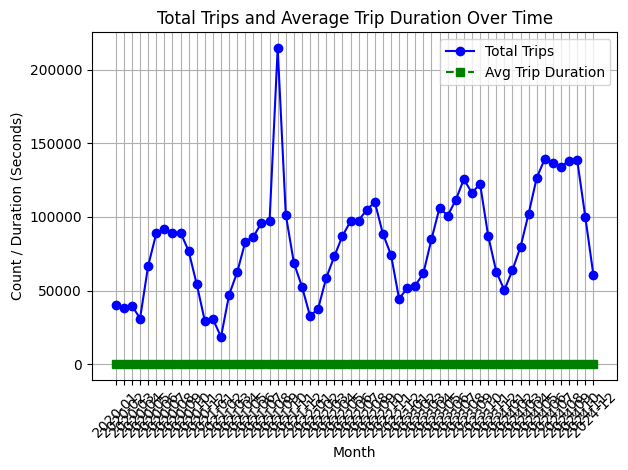

In [ ]:
# Total trips
plt.plot(monthly_metrics['year_month'], monthly_metrics['total_trips'], marker='o', label='Total Trips', color='blue')

# Average trip duration
plt.plot(monthly_metrics['year_month'], monthly_metrics['avg_trip_duration'], marker='s', linestyle='--', label='Avg Trip Duration', color='green')

plt.title("Total Trips and Average Trip Duration Over Time")
plt.xlabel("Month")
plt.ylabel("Count / Duration (Seconds)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

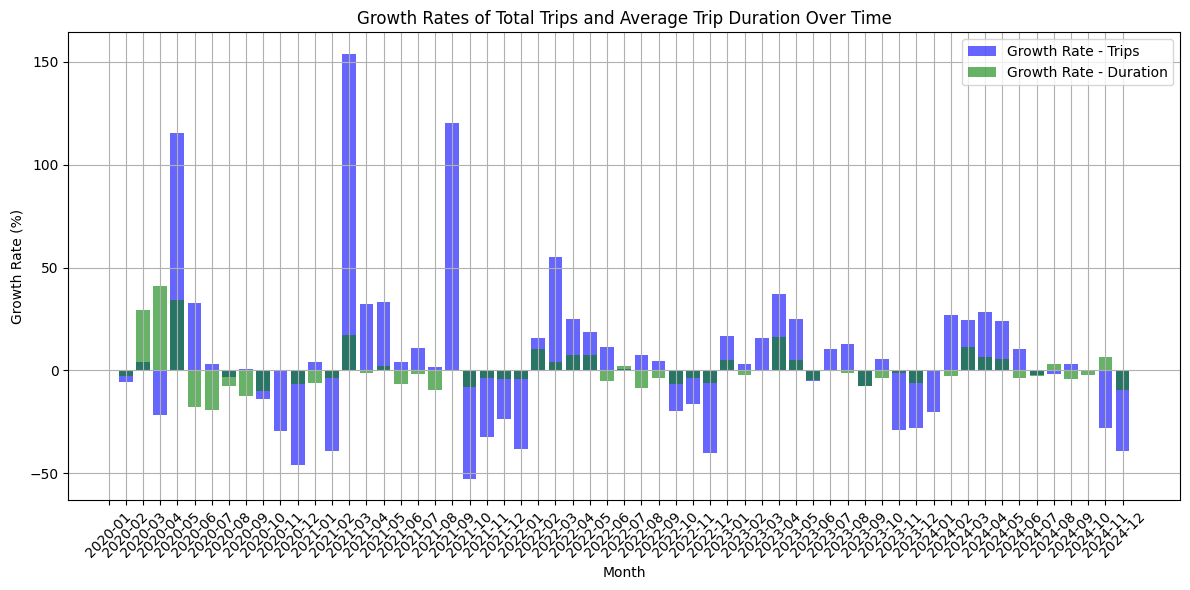

In [ ]:
plt.figure(figsize=(12, 6))

# Growth rate for trips
plt.bar(monthly_metrics['year_month'], monthly_metrics['growth_rate_trips'], alpha=0.6, label="Growth Rate - Trips", color='blue')

# Growth rate for duration
plt.bar(monthly_metrics['year_month'], monthly_metrics['growth_rate_duration'], alpha=0.6, label="Growth Rate - Duration", color='green')

plt.title("Growth Rates of Total Trips and Average Trip Duration Over Time")
plt.xlabel("Month")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

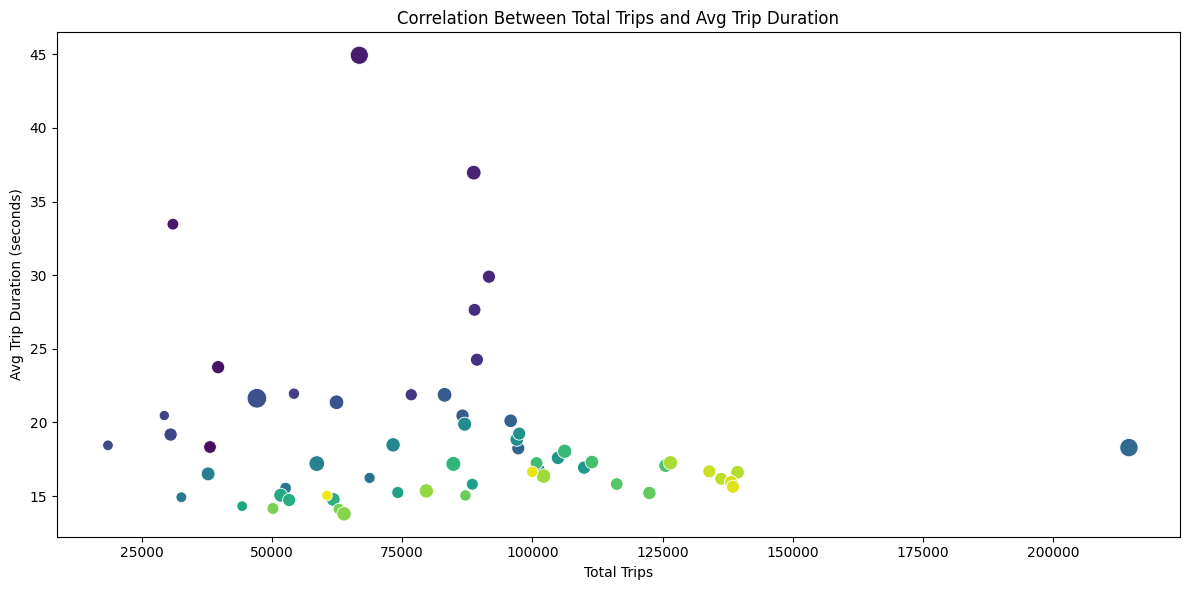

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x=monthly_metrics['total_trips'], y=monthly_metrics['avg_trip_duration'], hue=monthly_metrics['year_month'], palette='viridis', size=monthly_metrics['growth_rate_trips'], sizes=(50, 200), legend=None)
plt.title("Correlation Between Total Trips and Avg Trip Duration")
plt.xlabel("Total Trips")
plt.ylabel("Avg Trip Duration (seconds)")
plt.tight_layout()
plt.show()

In [ ]:
df_subs = collated_df[collated_df['passholder_type'].isin(subscriber_types)]

In [ ]:
subscriber_types = ['Indego365', 'Indego30']
df_subs = collated_df[collated_df['passholder_type'].isin(subscriber_types)]

In [ ]:
subs_monthly_trips = df_subs.groupby('year_month').size().reset_index(name='subscriber_trips')

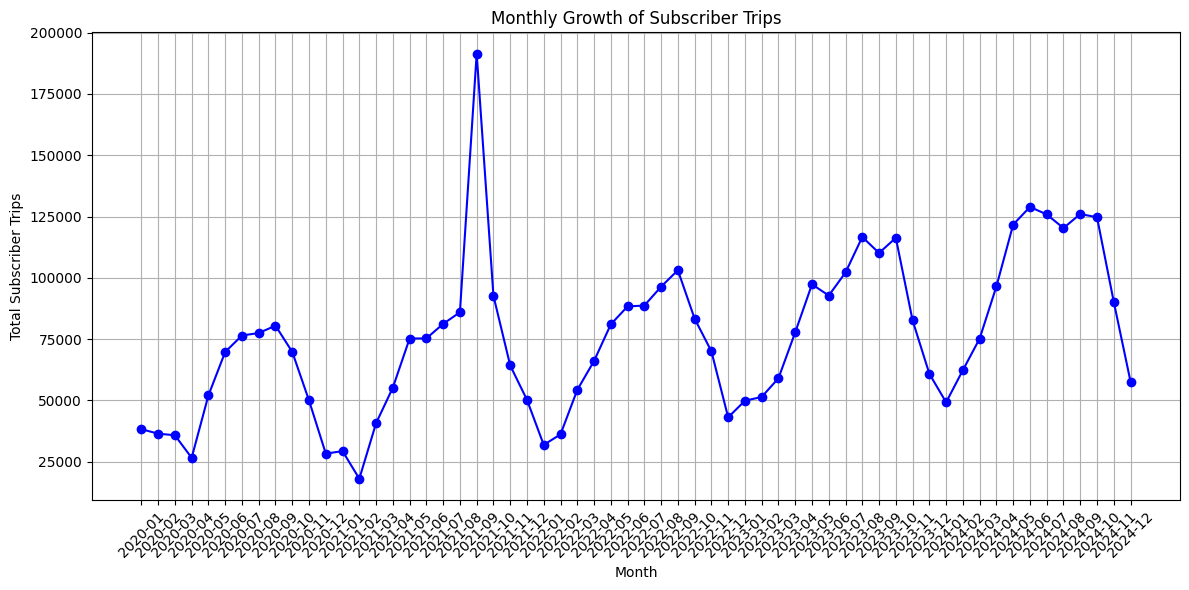

In [ ]:
subs_monthly_trips['year_month'] = subs_monthly_trips['year_month'].astype(str)

plt.figure(figsize=(12,6))
plt.plot(subs_monthly_trips['year_month'], subs_monthly_trips['subscriber_trips'], marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Monthly Growth of Subscriber Trips')
plt.xlabel('Month')
plt.ylabel('Total Subscriber Trips')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
subs_monthly_trips['growth_rate'] = subs_monthly_trips['subscriber_trips'].pct_change() * 100

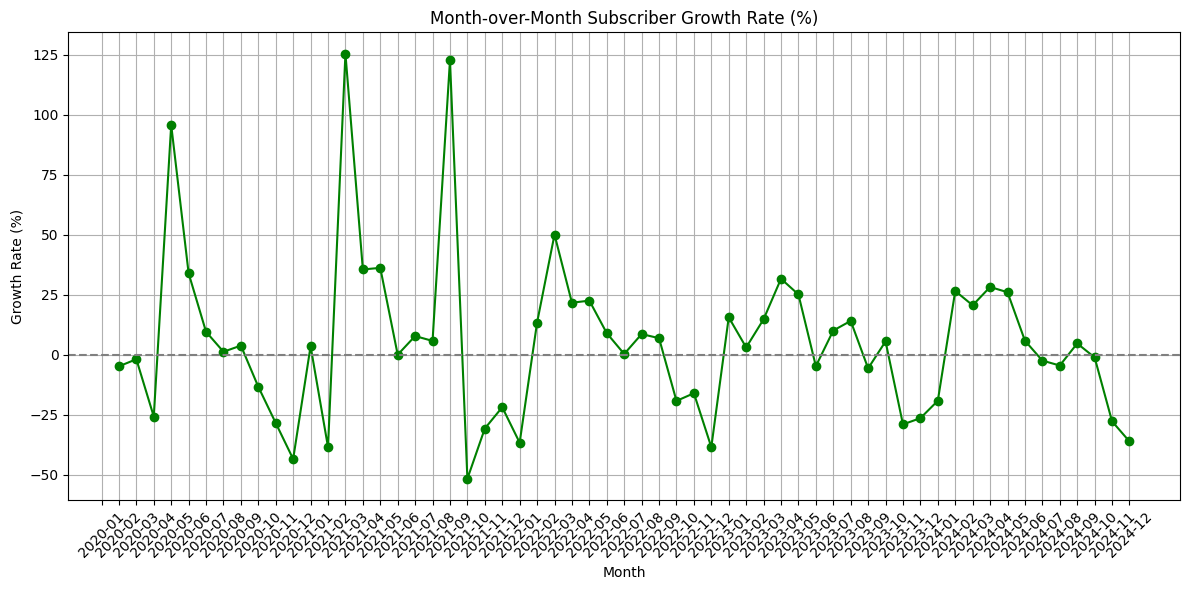

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(subs_monthly_trips['year_month'], subs_monthly_trips['growth_rate'], marker='o', color='green')
plt.xticks(rotation=45)
plt.title('Month-over-Month Subscriber Growth Rate (%)')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, linestyle='--', color='gray')
plt.grid(True)
plt.tight_layout()
plt.show()